#                                         MECÁNICA CUÁNTICA 1 - TAREA 4
Liliana Cuadrado 201613924

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint , simps
from scipy.optimize import brentq

In [55]:
#Constantes
k = 100.0 
m = 1.0
w = (k/m)**0.5   #frecuencia

h = 1.0 
E = 0.0          #Energía
L = 1.0          #Amplitud del potencial
cl= 0.5*k*L**2   #Límite clásico

x_max = 2.0*L 
N = 5000 #Numero de puntos

#Arreglos
x = np.linspace(-x_max, x_max, N)  #Rango a graficar
psi = np.zeros([N,2])              #Arreglo para guardar solución de psi
dE = np.linspace(0,k*L**2, 100)    #Rango de energia

listaPar=[]
listaImpar=[]

In [56]:
#Defino el potencial V
def V(x):
    if abs(x) < L:
        return 0.5*k*x**2
    else:
        return cl

#función que me de los valores de la primera y segunda derivada de psi
def model(psi, x):
    d_psi= psi[1]        #primera derivada
    dd_psi = (-(2.0*m)/(h**2))*(E - V(x))*psi[0] #segunda derivada
    return np.array([d_psi, dd_psi])

#Resuelvo la ecuación diferencial con "odeint" con las condiciones necesarias para que la SOLUCIÓN sea PAR
psi_inicial = np.array([1,0])      #Valores iniciales para obtener una solución par
def func(e):
    global E
    global psi
    E = e
    psi = odeint(model, psi_inicial, x)
    return psi[-1,0]

#Lista con la solución de psi
for i in dE:
    listaPar.append(func(i)) 

Text(0, 0.5, 'Psi(x)')

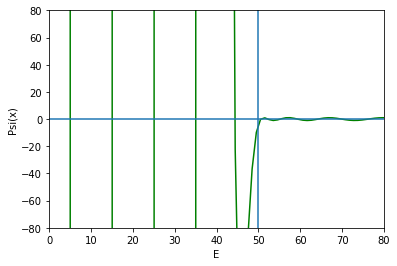

In [63]:
#Energía con psi par
plt.plot(dE,listaPar, color="g")
plt.axis([0,80,-80,80]) #hago zoom sobre la gráfica
plt.axhline(y=0)
plt.axvline(x=cl)
plt.xlabel('E')
plt.ylabel('Psi(x)')

In [58]:
#Resuelvo la ecuación diferencial las condiciones necesarias para que la SOLUCIÓN sea IMPAR
psi_inicial = np.array([0,1])  #Valores iniciales para obtener una solución impar

def func(e):
    global E
    global psi
    E = e
    psi = odeint(model, psi_inicial, x)
    return psi[-1,0]

for i in dE:
    listaImpar.append(func(i)) 

Text(0, 0.5, 'Psi(x)')

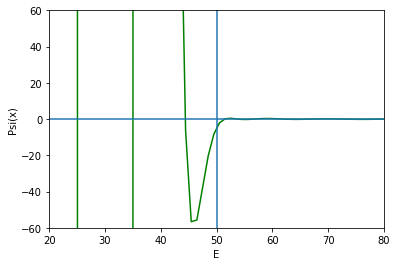

In [59]:
plt.plot(dE, listaImpar, color="g")
plt.axis([20,80,-60,60])
plt.axhline(y=0)
plt.axvline(x=cl)
plt.xlabel('E')
plt.ylabel('Psi(x)')

Viendo las gráficas, notamos que cumple el principio de correspondecia pues la propbablidad antes de llegar al límite clásico es mucho mayor.

In [60]:
#Hallamos los ceros de las gráficas anteriores. Estas energías corresponden a la posición del potencial donde
#la probabilidad debe ser 0

def raices(x,f):
    lista2= []
    a = np.sign(f)
    for i in range(len(f)-1):
        if a[i]+a[i+1] == 0:
            raiz = brentq(func, x[i], x[i+1])
            lista2.append(raiz)
    return lista2

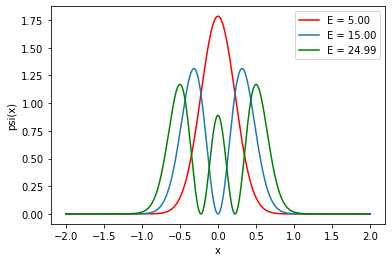

In [61]:
#grafica de funciones de acuerdo a los niveles permitidos de la energía
ceros = raices(dE, listaImpar) 

func(ceros[0])
area= (np.trapz(psi[:,0]**2, dx=2.0*x_max/N))

plt.plot(x, (psi[:,0]**2)/area, label="E = %.2f" %ceros[0], color="r")
plt.legend(loc="upper right")
plt.xlabel('x')
plt.ylabel('psi(x)')



func(ceros[1])
area= (np.trapz(psi[:,0]**2, dx=2.0*x_max/N))
plt.plot(x, (psi[:,0]**2)/area, label="E = %.2f" %ceros[1])
plt.legend(loc="upper right")



func(ceros[2])
area=np.trapz(psi[:,0]**2, dx=2.0*x_max/N) 
plt.plot(x, (psi[:,0]**2)/area, label="E = %.2f" %ceros[2], color="g")
plt.legend(loc="upper right")


#Graficas de los tres primeros niveles